## -------------------Name: Swapnil Shashank Parkhe (UIN: 660014865)-------------------------

## IDS566 - HW1

## Importing relevant libraries

In [311]:
#For General purpose
import os
import json

#For Math calculations and data manipulations 
import numpy as np
import pandas as pd
import re

#For Machine learning algos
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

#For Plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Importing data

In [6]:
shutdown=json.load(open("shutdown.json"))

print(type(shutdown))
print(len(shutdown))

<class 'list'>
5000


## Q1)  Load all tweets, and retweet usernames; Top 5 most popular retweet usernames?

In [504]:
#Loading (and storing) all tweets and usernames
tweets=[item["text"] for item in shutdown]
retweet_usernames=[item["retweeted_status"]['user']['screen_name'] 
                  for item in shutdown if 'retweeted_status' in item.keys()]

#Top 5 most popular retweet usernames (based on frequency)
print("Top 5-Most popular retweet usernames are",
      list(pd.DataFrame(retweet_usernames,columns=['Freq_Usernames'])['Freq_Usernames'].value_counts().head().index))

Top 5-Most popular retweet usernames are ['FoxNews', 'SenDougJones', 'peterdaou', 'TheDailyEdge', 'BanditRandom']


## Q2) Remove duplicate tweets. How many tweets are remained?

In [48]:
#Removing duplicate tweets (based on 'text' key)
tweets_unique=list(set(tweets))

#No. of tweets before and after de-duplication
print("Before de-duplication:",len(tweets))
print("After de-duplication :",len(tweets_unique))

Before de-duplication: 5000
After de-duplication : 919


## Q3) Remove URLs and mentions and rename hashtag sign to ‘hashtag_’. Vectorize tweets using binary vectorization. What are top 5 popular hashtags? 


In [503]:
#Creating pattern objects for URL, mentions(@), hastag(#), tokens(size2)
pattern_url = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', re.UNICODE | re.IGNORECASE)
pattern_mention = re.compile('(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)', re.UNICODE | re.IGNORECASE)
pattern_hashtag = re.compile('(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9]+)', re.UNICODE | re.IGNORECASE)
pattern_token = re.compile('\w\w+', re.UNICODE | re.IGNORECASE)

#Removing URLs(in first operation) and mentions(in second operation)
temp1a = [pattern_mention.sub('', item) for item in [pattern_url.sub('', item) for item in tweets_unique]]

#Renaming hashtags(#) to hashtag_
tweets_unique_clean = [pattern_hashtag.sub(r'hashtag_\1', item) for item in temp1a]

#Vectorizing tweets using binary vectorization
BinVect = CountVectorizer(binary=True)
tweets_unique_BinVect = BinVect.fit_transform(tweets_unique_clean)
 
#Top 5 popular hashtags - (based on de-duplicated tweets list)
CntVect = CountVectorizer()
tweets_unique_CntVect = CntVect.fit_transform(tweets_unique_clean)

df=pd.DataFrame(tweets_unique_CntVect.toarray(),columns=CntVect.get_feature_names()) #Creating pandas DF
df_hashtag_= df[df.columns[df.columns.to_series().str.contains('hashtag_')]] #Subsetting "hashtag_" columns
df_hashtag_counts = pd.DataFrame(df_hashtag_.apply(sum,axis=0), index=df_hashtag_.apply(sum,axis=0).index, columns=["count"])
print("Top 5-Most popular hashtags are", list(df_hashtag_counts["count"].sort_values(ascending=False).head().index))

Top 5-Most popular hashtags are ['hashtag_shutdown', 'hashtag_trumpshutdown', 'hashtag_trump', 'hashtag_schumershutdown', 'hashtag_shutdown2018']


## Q4) Map document to term matrix to 2D space and plot it using binary vectorization. Repeat that for count vectorization and TF-IDF vectorization. Analyze your result
Analysing below results: Overall, in all the three parts for Q4 above, LSA(SVD) is helping us reduce dimensionality from 3069 features to 2 features here such that LSA is doing additional weighting and is able to find latent links:
1. For first plot (green), we could see 3 distinct clusters -> possibility of 3 distinct classes based on the Bineary vectorized features
2. For second plot (red), we could see 4 distinct clusters -> possibility of 4 distinct classes based on the Count Vectorized features
3. For third plot (blue), we could see 2 distinct clusters -> possibility of 2 distinct classes based on the Tfidf features

Dimension (919, 3069) -> (919, 2)


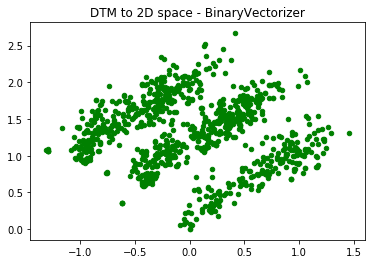

In [350]:
#Reduce dimensions of "tweets_unique_BinVect" DTM created above in Q3 part
lsa_1 = TruncatedSVD(2)
tweets_unique_BinVect_2d = lsa_1.fit_transform(tweets_unique_BinVect)
print("Dimension %s -> %s" % (tweets_unique_BinVect.shape, tweets_unique_BinVect_2d.shape))

plt.scatter(tweets_unique_BinVect_2d[:, 1], tweets_unique_BinVect_2d[:, 0], 20, c = "green")
plt.title('DTM to 2D space - BinaryVectorizer')
plt.show()

Dimension (919, 3069) -> (919, 2)


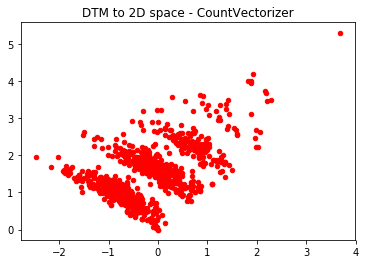

In [351]:
#Reduce dimensions of "tweets_unique_CntVect" DTM created above in Q3 part
lsa_2 = TruncatedSVD(2)
tweets_unique_CntVect_2d = lsa_2.fit_transform(tweets_unique_CntVect)
print("Dimension %s -> %s" % (tweets_unique_CntVect.shape, tweets_unique_CntVect_2d.shape))

plt.scatter(tweets_unique_CntVect_2d[:, 1], tweets_unique_CntVect_2d[:, 0], 20, c = "red")
plt.title('DTM to 2D space - CountVectorizer')
plt.show()

Dimension (919, 3069) -> (919, 2)


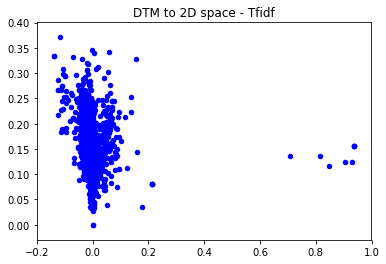

In [531]:
#Reduce dimensions of "tweets_unique_TfidfVect" DTM created below
TfidfVect = TfidfVectorizer(binary = True)
tweets_unique_TfidfVect = TfidfVect.fit_transform(tweets_unique_clean)

lsa_3 = TruncatedSVD(2)
tweets_unique_TfidfVect_2d = lsa_3.fit_transform(tweets_unique_TfidfVect)
print("Dimension %s -> %s" % (tweets_unique_TfidfVect.shape, tweets_unique_TfidfVect_2d.shape))

plt.scatter(tweets_unique_TfidfVect_2d[:, 1], tweets_unique_TfidfVect_2d[:, 0], 20, c = "blue")
plt.title('DTM to 2D space - Tfidf')
plt.show()

## Q5) Co-occurrence analysis: Find which two hashtags appear together in a same tweet mostly? Which two are the second most? Analyze your results.
Analyzing below resuls: We could see the combination of 'hashtag_shutdown' with other hashtags is usually very popular (its also because of a higher frequency of 'hashtag_shutdown' itself). Also, it reflects how people on twitter reacted to President Trump's tweet pertaining to statement on Twitter(I would like to see Govt shutdown) including hashtags for CHIP and DREAMers frequenctly with hashtag for shutdown. Also, the result for this data are highly skewed (with 686 coccurrences for #shutdown and #chip, whereas other coccurrrences are less than 1/3red of this number


In [530]:
#Creating a pandas dataframe to store DTM first; then subsetting 'hashtag_' columns
df=pd.DataFrame(tweets_unique_CntVect.toarray(),columns=CntVect.get_feature_names()) #Creating pandas DF
df_hashtag_= df[df.columns[df.columns.to_series().str.contains('hashtag_')]] #Subsetting "hashtag_" columns

#Creating the coccurence matrix; filling diagonal values with 0 (as occurrence of A with A is freq of A across docs and is trivial)
df_cooccurrence = df2_hashtag_.T.dot(df2_hashtag_)
np.fill_diagonal(df_cooccurrence.values,0)

#Formulating a function to find the 'hashtag_' combination that occur first-most and second-most times respectively
def Nth_most_coccurrence(data, n):
    '''
    data: input cross-tabulated data
    n: nth most coccurrence
    corresponding combination of 'hashtag_' will be printed out
    '''
    print(n,"th most popular hashtag combination is",
          list(data.stack().drop_duplicates().sort_values(ascending=False).index[n-1]))
    
Nth_most_coccurrence(df_cooccurrence, 1)
Nth_most_coccurrence(df_cooccurrence, 2)

1 th most popular hashtag combination is ['hashtag_chip', 'hashtag_shutdown']
2 th most popular hashtag combination is ['hashtag_dreamers', 'hashtag_shutdown']


In [540]:
df_cooccurrence.stack().drop_duplicates().sort_values(ascending=False)

hashtag_chip                hashtag_shutdown            686
hashtag_dreamers            hashtag_shutdown            173
hashtag_chip                hashtag_dreamers            138
hashtag_shutdown            hashtag_trumpshutdown       134
hashtag_government          hashtag_shutdown            111
hashtag_schumershutdown     hashtag_shutdown             85
hashtag_fox10phoenix        hashtag_government           79
hashtag_shutdown            hashtag_shutdown2018         55
hashtag_billion             hashtag_borderwall           54
hashtag_daca                hashtag_shutdown             48
hashtag_governmentshutdown  hashtag_shutdown             38
hashtag_dc                  hashtag_shutdown             24
hashtag_government          hashtag_shutdown2018         23
hashtag_america             hashtag_government           22
hashtag_gop                 hashtag_shutdown             21
hashtag_daca                hashtag_trumpshutdown        20
hashtag_trump               hashtag_trum

## Q6) What did you learn from this assignment? What is the conclusion?
I learnt that in order to analyse a text or perform text mining, we need to follow a series of steps starting from understanding the problem and requirement correctly -> importing and gleaning text data appropriately -> cleaning it to get to interpretable and sensible form (replacing urls, hashtags, etc.) -> Vectorize it using different methods/metrics -> Visualise it and perform an exploratory data analysis to see how text's features are behaving across instances, so as to make a sense out it and take decision for relevant text analytics based models. In conclusion, I would say that we need to know what our question of focus is by asking the right and enough questions, and how our text is structured and find patterns through exploratory data analysis (univariates, bivariates, visual/numerical, etc.) before even applying any machine leanrning based models. 